<center><h1>Review Python List and Dictionary</h1></center>

In [10]:
student1 = {'id':'1111','name':'David Chan'} # Python dictionary is similar to JavaScript object
student2 = {'id':'1112','name':'Peter Lee'}
print(student1,student2) # similar to JavaScript document.write
students = []                # Python list is similar to JavaScript array
students.append(student1)    # Python list append is similar to JavaScript array push
students.append(student2)
print(students) # print out a list of dictionaries
for i in students: # Python for loop is similar to JavaScript for (i=0;i<students.length;i++) {document.write...}
    print(i)       # print out a list of dictionaries
print('***************************************************************************')
key = 0
for i in students:
    print(i)              # first loop prints out individual dictionary
    for key in i:           # second loop within first loop prints out individual element within each dictionary
        print(key, ':', i[key])

{'id': '1111', 'name': 'David Chan'} {'id': '1112', 'name': 'Peter Lee'}
[{'id': '1111', 'name': 'David Chan'}, {'id': '1112', 'name': 'Peter Lee'}]
{'id': '1111', 'name': 'David Chan'}
{'id': '1112', 'name': 'Peter Lee'}
***************************************************************************
{'id': '1111', 'name': 'David Chan'}
id : 1111
name : David Chan
{'id': '1112', 'name': 'Peter Lee'}
id : 1112
name : Peter Lee


<h1><center>Creating Pandas DataFrames from Lists and Dictionaries (orginal source: https://pbpython.com/pandas-list-dict.html by Practical Business Python
</center></h1>

In [63]:
import pandas as pd
# Define a list of dictionaries
sales = [{'account': 'Jones LLC', 'Jan': 150, 'Feb': 200, 'Mar': 140},
         {'account': 'Alpha Co',  'Jan': 200, 'Feb': 210, 'Mar': 215},
         {'account': 'Blue Inc',  'Jan': 50,  'Feb': 90,  'Mar': 95 }]
df = pd.DataFrame(sales) # Assign the list of dictionaries to a dataframe
df # display dataframe

,account,Jan,Feb,Mar
0,Jones LLC,150,200,140
1,Alpha Co,200,210,215
2,Blue Inc,50,90,95


In [15]:
# Define a dictionary of list
sales = {'account': ['Jones LLC', 'Alpha Co', 'Blue Inc'],
         'Jan': [150, 200, 50],
         'Feb': [200, 210, 90],
         'Mar': [140, 215, 95]}
df = pd.DataFrame.from_dict(sales) # Assign the dictionary of lists to a dataframe 
df # display dataframe

,account,Jan,Feb,Mar
0,Jones LLC,150,200,140
1,Alpha Co,200,210,215
2,Blue Inc,50,90,95


<h1><center>Finding and Selection Cells, Rows, and Columns in Pandas </center></h1>

In [64]:
import pandas as pd
import numpy as np

d1 = {'Name': ['Pankaj', 'Meghna', 'David', 'Lisa'], 'ID': [1, 2, 3, 4], 'Salary': [100, 200, np.nan, pd.NaT],
      'Role': ['CEO', None, pd.NaT, '']}

df = pd.DataFrame(d1)
df.index # show number of entries

RangeIndex(start=0, stop=4, step=1)

In [65]:
df.info() # show field names and types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
Name      4 non-null object
ID        4 non-null int64
Salary    2 non-null object
Role      2 non-null object
dtypes: int64(1), object(3)
memory usage: 256.0+ bytes


In [83]:
df.loc[1,'Name'] # Location specific field (i.e. column) entry from a specific row

'Meghna'

In [86]:
# Using a loop to find entries
for i in df[df['Role'] == ''].index: 
    print(df.loc[i,'Name'])

Lisa


In [87]:
# Use conditional to find an entry
df[df['Salary'] > 100]

,Name,ID,Salary,Role
1,Meghna,2,200,None


In [66]:
print(df)
df.loc[1:2,'Name':'Salary']

     Name  ID Salary  Role
0  Pankaj   1    100   CEO
1  Meghna   2    200  None
2   David   3    NaN   NaT
3    Lisa   4    NaT      


,Name,ID,Salary
1,Meghna,2,200
2,David,3,NaN


In [27]:
df.loc[[0,2,3],['Name','Salary','Role']] # Selectively pick row 0,2&3 of column Name, Salary, & Role

,Name,Salary,Role
0,Pankaj,100,CEO
2,David,NaT,NaT
3,Lisa,NaT,NaT


In [28]:
df.loc[0:2,['Name','Salary','Role']] # Print the range from 0 to 2 of only column Name, 
                                           # Salary, and Role.

,Name,Salary,Role
0,Pankaj,100,CEO
1,Meghna,200,None
2,David,NaT,NaT


In [39]:
df[df['Salary'].isnull()]

,Name,ID,Salary,Role
2,David,3,NaN,NaT
3,Lisa,4,NaT,NaT


In [62]:
print(df)
filter = df["Role"] != ''
dfNew = df[filter]
print(dfNew)

     Name  ID Salary  Role
0  Pankaj   1    100   CEO
1  Meghna   2    200  None
2   David   3    NaN   NaT
3    Lisa   4    NaT      
     Name  ID Salary  Role
0  Pankaj   1    100   CEO
1  Meghna   2    200  None
2   David   3    NaN   NaT


In [67]:
dfNew.isnull().sum()

Name      0
ID        0
Salary    1
Role      2
dtype: int64

In [81]:
print('*********** df ***********')
print(df)
print('********** dfNew **********')
print(dfNew)
df1 = dfNew.dropna(subset=['Role'])
print('********** df1 **********')
print(df1)
print('****** Role is Null ******')
print(df[df['Role'].isnull()])

*********** df ***********
     Name  ID Salary  Role
0  Pankaj   1    100   CEO
1  Meghna   2    200  None
2   David   3    NaN   NaT
3    Lisa   4    NaT      
********** dfNew **********
     Name  ID Salary  Role
0  Pankaj   1    100   CEO
1  Meghna   2    200  None
2   David   3    NaN   NaT
********** df1 **********
     Name  ID Salary Role
0  Pankaj   1    100  CEO
****** Role is Null ******
     Name  ID Salary  Role
1  Meghna   2    200  None
2   David   3    NaN   NaT


<h1><center>Eliminate Null Values </center></h1>

<h1><center>Pandas dropna – Drop Null/NA Values from DataFrame (Source: https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe) </center></h1>

In [75]:
# Pandas Drop All Rows with any Null/NaN/NaT Values
import pandas as pd
import numpy as np

d1 = {'Name': ['Pankaj', 'Meghna', 'David', 'Lisa'], 'ID': [1, 2, 3, 4], 'Salary': [100, 200, np.nan, pd.NaT],
      'Role': ['CEO', None, pd.NaT, pd.NaT]}

df = pd.DataFrame(d1)

print(df)

# drop all rows with any NaN and NaT values
df1 = df.dropna() # same as df.dropna(axis=0)
print(df1)

     Name  ID Salary  Role
0  Pankaj   1    100   CEO
1  Meghna   2    200  None
2   David   3    NaN   NaT
3    Lisa   4    NaT   NaT
     Name  ID Salary Role
0  Pankaj   1    100  CEO


In [47]:
# Drop All Columns with Any Missing Value
df1 = df.dropna(axis=1)
print(df1)

     Name  ID
0  Pankaj   1
1  Meghna   2
2   David   3
3    Lisa   4


In [49]:
# Drop Row/Column Only if All the Values are Null
import pandas as pd
import numpy as np

d1 = {'Name': ['Pankaj', 'Meghna', 'David', pd.NaT], 'ID': [1, 2, 3, pd.NaT], 'Salary': [100, 200, np.nan, pd.NaT],
      'Role': [np.nan, np.nan, pd.NaT, pd.NaT]}

df = pd.DataFrame(d1)

print(df)

df1 = df.dropna(how='all')
print(df1)

df2 = df.dropna(how='all', axis=1)
print(df2)

     Name   ID Salary Role
0  Pankaj    1    100  NaT
1  Meghna    2    200  NaT
2   David    3    NaN  NaT
3     NaT  NaT    NaT  NaT
     Name ID Salary Role
0  Pankaj  1    100  NaT
1  Meghna  2    200  NaT
2   David  3    NaN  NaT
     Name   ID Salary
0  Pankaj    1    100
1  Meghna    2    200
2   David    3    NaN
3     NaT  NaT    NaT


In [50]:
# DataFrame Drop Rows/Columns when the threshold of null values is crossed
d1 = {'Name': ['Pankaj', 'Meghna', 'David', pd.NaT], 'ID': [1, 2, pd.NaT, pd.NaT], 'Salary': [100, 200, np.nan, pd.NaT],
      'Role': [np.nan, np.nan, pd.NaT, pd.NaT]}

df = pd.DataFrame(d1)

print(df)

df1 = df.dropna(thresh=2)
print(df1)

     Name   ID Salary Role
0  Pankaj    1    100  NaT
1  Meghna    2    200  NaT
2   David  NaT    NaN  NaT
3     NaT  NaT    NaT  NaT
     Name ID Salary Role
0  Pankaj  1    100  NaT
1  Meghna  2    200  NaT


In [51]:
# Define Labels to look for null values
import pandas as pd
import numpy as np

d1 = {'Name': ['Pankaj', 'Meghna', 'David', 'Lisa'], 'ID': [1, 2, 3, pd.NaT], 'Salary': [100, 200, np.nan, pd.NaT],
      'Role': ['CEO', np.nan, pd.NaT, pd.NaT]}

df = pd.DataFrame(d1)

print(df)

df1 = df.dropna(subset=['ID'])
print(df1)

     Name   ID Salary Role
0  Pankaj    1    100  CEO
1  Meghna    2    200  NaN
2   David    3    NaN  NaT
3    Lisa  NaT    NaT  NaT
     Name ID Salary Role
0  Pankaj  1    100  CEO
1  Meghna  2    200  NaN
2   David  3    NaN  NaT


<h1><center>Eliminate Dublicate Values </center></h1>

<h1><center>Find the duplicate rows of the dataframe in python pandas (Source:http://www.datasciencemadesimple.com/find-duplicate-rows-dataframe-python-pandas/)</center></h1>

In [27]:
# import pandas as pd
import numpy as np
 
#Create a DataFrame
d = {
    'Name':['Alisa','Bobby','jodha','jack','raghu','Cathrine',
            'Alisa','Bobby','kumar','Alisa','Alex','Cathrine'],
    'Age':[26,24,23,22,23,24,26,24,22,23,24,24],
      
       'Score':[85,63,55,74,31,77,85,63,42,62,89,77]}
 
df = pd.DataFrame(d,columns=['Name','Age','Score'])
df

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
6,Alisa,26,85
7,Bobby,24,63
8,kumar,22,42
9,Alisa,23,62


In [28]:
df["is_duplicate"]= df.duplicated()
df

,Name,Age,Score,is_duplicate
0,Alisa,26,85,False
1,Bobby,24,63,False
2,jodha,23,55,False
3,jack,22,74,False
4,raghu,23,31,False
5,Cathrine,24,77,False
6,Alisa,26,85,True
7,Bobby,24,63,True
8,kumar,22,42,False
9,Alisa,23,62,False


In [104]:
df_removed=df.loc[0:11,'Name':'Score']
df_removed

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
6,Alisa,26,85
7,Bobby,24,63
8,kumar,22,42
9,Alisa,23,62


In [105]:
df = df_removed.drop_duplicates()
df

,Name,Age,Score
0,Alisa,26,85
1,Bobby,24,63
2,jodha,23,55
3,jack,22,74
4,raghu,23,31
5,Cathrine,24,77
8,kumar,22,42
9,Alisa,23,62
10,Alex,24,89


<h1><center>Learning Matplotlib for Data Visualization</center></h1>

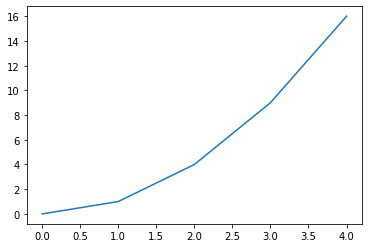

In [40]:
from matplotlib import pyplot as plt
x_values = [0, 1, 2, 3, 4]
y_values = [0, 1, 4, 9, 16]
plt.plot(x_values, y_values)
plt.show()

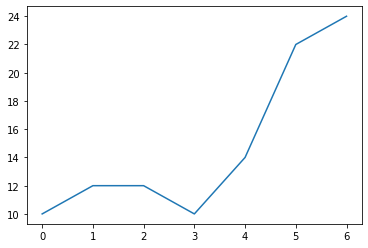

In [66]:
from matplotlib import pyplot as plt
days = range(7)
money_spent = [10,12,12,10,14,22,24]
plt.plot(days,money_spent)
plt.show()

# Creating plot style by varying colors, linestyles, and markers.
# Add clarity to the visualization by using title, label and legend.

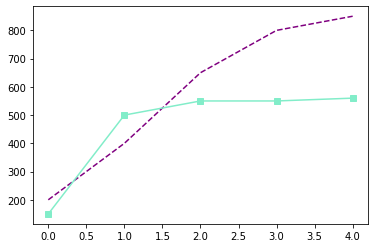

In [67]:
from matplotlib import pyplot as plt
time = [0, 1, 2, 3, 4]
revenue = [200, 400, 650, 800, 850]
costs = [150, 500, 550, 550, 560]
plt.plot(time, revenue, color='purple',linestyle='--')
plt.plot(time, costs, color='#82edc9',marker='s')
plt.show()

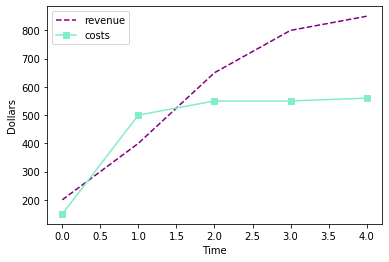

In [69]:
from matplotlib import pyplot as plt
time = [0, 1, 2, 3, 4]
revenue = [200, 400, 650, 800, 850]
costs = [150, 500, 550, 550, 560]
plt.plot(time, revenue, color='purple',linestyle='--')
plt.plot(time, costs, color='#82edc9',marker='s')
plt.xlabel('Time')
plt.ylabel('Dollars')
plt.legend(['revenue', 'costs'])
plt.show()

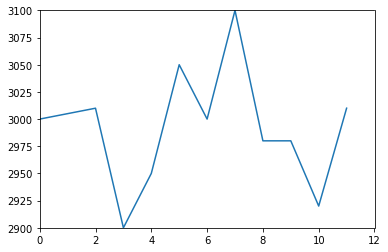

In [70]:
x = range(12)
y = [3000, 3005, 3010, 2900, 2950, 3050, 3000, 3100, 2980, 2980, 2920, 3010]
plt.plot(x, y)
plt.axis([0, 12, 2900, 3100])
plt.show()